# Inicialización

Definamos algunas variables de entorno que utilizaremos a lo largo de este notebook:

In [2]:
from pathlib import Path

CDPP_TP1 = Path.cwd()

### Simulador CD++

In [22]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1/src
#pwd
#Comentar make clean ante un error
#make clean

make -j4

g++ -c -I../../../src/cd++/.ipynb_checkpoints -I../../../src/cd++/atomics -I../../../src/cd++/atomics/cpu -I../../../src/cd++/atomics/cpu/obj -I../../../src/cd++/atomics/generator -I../../../src/cd++/atomics/generator/.ipynb_checkpoints -I../../../src/cd++/atomics/generator/obj -I../../../src/cd++/atomics/qss -I../../../src/cd++/atomics/qss/obj -I../../../src/cd++/atomics/queue -I../../../src/cd++/atomics/queue/obj -I../../../src/cd++/atomics/transducer -I../../../src/cd++/atomics/transducer/obj -I../../../src/cd++/cell -I../../../src/cd++/cell/obj -I../../../src/cd++/evt -I../../../src/cd++/evt/obj -I../../../src/cd++/main -I../../../src/cd++/main/obj -I../../../src/cd++/misc -I../../../src/cd++/misc/math -I../../../src/cd++/misc/math/obj -I../../../src/cd++/misc/obj -I../../../src/cd++/model -I../../../src/cd++/model/obj -I../../../src/cd++/model/state -I../../../src/cd++/model/state/obj -I../../../src/cd++/msg -I../../../src/cd++/msg/obj -I../../../src/cd++/parser -I../../../src/cd+

In file included from ../../../src/cd++/val/tbool.h:21,
                 from ../../../src/cd++/val/real.h:22,
                 from ../../../src/cd++/utils/strutil.h:28,
                 from ../../../src/cd++/model/pmodeladm.h:29,
                 from ../../../src/cd++/model/port.h:25,
                 from ../../../src/cd++/model/model.h:26,
                 from ../../../src/cd++/msg/message.h:26,
                 from Persona.cpp:7:
../../../src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
Persona.cpp:118:27:   required from here
../../../src/cd++/val/tuple_value.h:59:37: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
   59 |         MASSERT(index >= 0 && index < this->values.size());
      |                               ~~~~~~^~~~~~~~~~~~~~~~~~~~~
../../../src/cd++/misc/except.h:32:30: note: in

g++ -c -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/.ipynb_checkpoints -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/.ipynb_checkpoints -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codenam

/usr/bin/ld: /data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


make[1]: Leaving directory '/data/0-Facu/2022-2C-SEDs/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'


## Simulación del modelo con CD++

Ahora nos paramos en donde se encuentra el ejecutable de la simulación y corremos la simulación:

In [4]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./tests/test01_persona.ma \
         -o ./tests/test01_persona.out \
         -l ./tests/test01_persona.log \
         -t 10:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./tests/test01_persona.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ./tests/test01_persona.log
Output to: ./tests/test01_persona.out
Tolerance set to: 1e-08
Configuration to s

### Análisis de los resultados

Veamos el resultado:

In [ ]:
%%bash -s "$CDPP_TP1"

cd $1/out

cat persona.out

In [6]:
import networkx as nx
import numpy as np
def generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, file="model.ma"):
    
    grados[grados>maxG] = maxG
    if(grados.sum() % 2 != 0):
        if(grados[0] < maxG):
            grados[0] = grados[0]+1
        else:
            grados[0] = grados[0]-1
            
    ps[ps>1] = 1
    ps[ps<-1] = -1

    infs[infs>1] = 1
    infs[infs<0] = 0
    
    pcs[pcs>1] = 1
    pcs[pcs<0] = 0

    tss[infs>1] = 1
    tss[infs<0] = 0
    
    pms[pms<0] = 0    
    
    f = open(CDPP_TP1.joinpath("model/"+file),'w')
    f.write("[Top]\n")
    f.write("components : Sociedad\n")
    
    f.write("in: infoRequest\n")

    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")

    f.write("Link : infoRequest infoRequest@Sociedad\n")
    for i in range(0,n):
        f.write("Link : info_out"+str(i)+"@Sociedad info_out"+str(i)+"\n")

    f.write("\n[Sociedad]\n")
    for i in range(0,n):
        f.write("components: Persona"+str(i)+"@Persona\n")
    f.write("in : infoRequest medios\n")
    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")
    for i in range(0,n):
        f.write("Link : outInfo@Persona"+str(i)+" info_out"+str(i)+"\n")
        f.write("Link : infoRequest infoRequest@Persona"+str(i)+"\n")

    conf_model = nx.configuration_model(grados)
    conf_model = nx.Graph(conf_model)
    conf_model.remove_edges_from(nx.selfloop_edges(conf_model))

    puerto_mas_alto = dict.fromkeys(range(0,n),1)

    for node in range(0,n):

        neighborhood = nx.all_neighbors(conf_model, node)
        degree = nx.degree(conf_model, node)
        nombre = "@Persona"+str(node)

        for neighbor in neighborhood:
            if neighbor > node:
                port = puerto_mas_alto[node]
                puerto_mas_alto[node] += 1

                out_port = "outPort"+str(port)
                in_port = "inPort"+str(port)

                port_neighbor = puerto_mas_alto[neighbor]
                puerto_mas_alto[neighbor] += 1

                nombre_vecino = "@Persona"+str(neighbor)
                out_port_neighbor = "outPort"+str(port_neighbor)
                in_port_neighbor = "inPort"+str(port_neighbor)

                f.write("Link : "+out_port+nombre+" "+in_port_neighbor+nombre_vecino+"\n")
                f.write("Link : "+out_port_neighbor+nombre_vecino+" "+in_port+nombre+"\n")

    for i in range(0,n):
        f.write("\n[Persona"+str(i)+"]\n")
        f.write("p : "+str(ps[i])+"\n")
        f.write("influenciabilidad : "+str(infs[i])+"\n")
        f.write("poder_convencimiento : "+str(pcs[i])+"\n")
        f.write("tiempo_sillon : "+str(tss[i])+"\n")
        f.write("periodo_medio : "+str(pms[i])+"\n")
        f.write("grado : "+str(nx.degree(conf_model, i))+"\n")

    f.close()
    return conf_model

In [12]:
n = 1000

ps = np.random.normal(0,0.7,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.5,0.2,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.5,0.2,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.2,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG =5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(1000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, file="model.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

cd $1/model

cat model.ma

In [69]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/model.ma \
         -e ./model/eventos.ev  \
         -o ./out/salidas.out \
         -l ./out/logPrueba.log \
         -t 00:10:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./model/model.ma
Loading events from ./model/eventos.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ./out/logPrueba.log
Output to: ./out/salidas.out
Tolerance set to: 1e-08
Configuration to show rea

In [93]:
#Lo use para testear el pasaje a 

import re
f = open("model.ma", "r")
file_contents = f.read()
lines = file_contents.replace("Link : ", "").split("\n")[:-1]
assert 2*nx.number_of_edges(conf_model) == len(lines)
for node in range(0,n):
    for port in range(1,maxG +1):
        inPort = file_contents.count("inPort"+str(port)+"@Persona"+str(node)+"\n")
        outPort = file_contents.count("outPort"+str(port)+"@Persona"+str(node)+" ")
        #print(node, port, "inPort", inPort, "outPort", outPort)
        assert inPort <= 1
        assert outPort <= 1
#print(file_contents)
for line in lines:
    numbers = re.findall(r'\d+', line)
    outPort = numbers[0]
    outPerson = numbers[1]
    inPort = numbers[2]
    inPerson = numbers[3]
    lineVuelta = "outPort"+str(inPort)+"@Persona"+str(inPerson)+" inPort"+str(outPort)+"@Persona"+str(outPerson)
    assert lines.count(lineVuelta) == 1, "falta "+lineVuelta+ "\npor: "+line
f.close()



<AxesSubplot:>

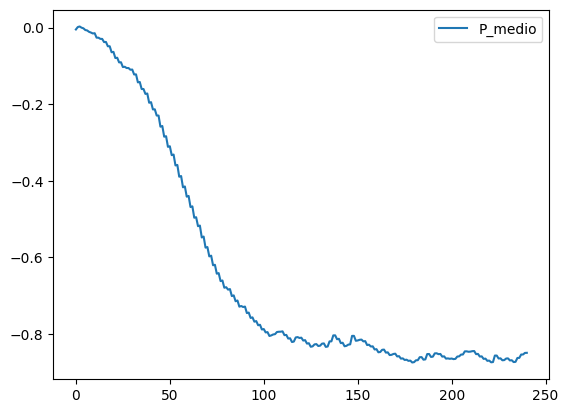

In [61]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getDataFrom(file="out/testTiempo.out"):
    
    f = open(file, "r")
    file_contents = f.read()
    lines = file_contents.split("\n")[:-1]
    for i in range(0,len(lines)):
        lines[i] = re.split('\s+', lines[i])
        lines[i][1] = re.findall(r'\d+', lines[i][1])[0]
    lines = np.array(lines)
 

    df = pd.DataFrame(columns = ['Tiempo', 'Persona', 'P'])
    df['Tiempo'] = lines[:,0]
    df['Persona'] = lines[:,1].astype(int)
    df['P'] = lines[:,2].astype(float)
    
    return df

def meansFromDF(df):
    data = df.to_numpy().reshape(241,1000,3)
    means = np.zeros(data.shape[0])
    tiempos = []
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        tiempos.append(data[i,0,0])
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_medio'])
    df['Tiempo'] = tiempos
    df['P_medio'] = means
    
    return df

df = getDataFrom("out/testTiempo.out")

means = meansFromDF(df)

    
means.plot()
